In [218]:
#!pip install -q datasist

In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#from datasist.structdata import detect_outliers

In [6]:
df=pd.read_csv("data.csv",na_values=['NoneUnknown','Unknown'])
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,NaN,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,"78,000",200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,"899,000",27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,"33,000",69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


In [7]:
df.shape

(9970, 20)

## Cheack feature,data types and missing values 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9854 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9156 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

## Cheack for duplicated data

In [9]:
df.duplicated().sum()

282

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(9688, 20)

In [13]:
df.describe()

,kilometers,year
count,9.688000e+03,8745.000000
mean,9.962276e+04,2015.609605
std,1.170904e+06,4.740368
min,0.000000e+00,1953.000000
25%,2.382650e+04,2014.000000
50%,7.700000e+04,2016.000000
75%,1.340000e+05,2019.000000
max,1.150000e+08,2021.000000


## Cheack for Null values

In [14]:
(df.isna().mean()*100)

title                   0.041288
price_in_aed            0.000000
kilometers              0.000000
body_condition          0.000000
mechanical_condition    0.000000
seller_type             0.000000
body_type               0.000000
no_of_cylinders         1.187036
transmission_type       0.000000
regional_specs          0.000000
horsepower              8.133774
fuel_type               0.000000
steering_side           0.000000
year                    9.733691
color                   0.000000
emirate                 0.000000
motors_trim             0.289017
company                 0.000000
model                   0.000000
date_posted             0.000000
dtype: float64

In [15]:
#Prsentage of Null values intair the whole data
(df.isna().mean()*100).sum()

19.384805945499586

## Handlin Null values

In [16]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()

In [17]:
df_numeric=df.select_dtypes(include=np.number)

In [18]:
df_catt=df.select_dtypes(include='object_')

In [19]:
df_numeric_Arr=imputer.fit_transform(df_numeric)

In [20]:
df_numeric_Arr

array([[1.6739e+05, 2.0130e+03],
       [3.9000e+04, 2.0180e+03],
       [2.0000e+05, 2.0140e+03],
       ...,
       [1.0000e+02, 2.0098e+03],
       [1.4000e+05, 2.0130e+03],
       [8.6000e+04, 2.0130e+03]])

In [21]:
len(df_numeric_Arr)

9688

In [22]:
df_numeric=pd.DataFrame(df_numeric_Arr,columns=imputer.get_feature_names_out())

In [23]:
df_numeric.shape

(9688, 2)

In [24]:
df_numeric.isna().sum()

kilometers    0
year          0
dtype: int64

In [25]:
df_numeric.shape

(9688, 2)

In [26]:
df_catt.isna().mean()*100

title                   0.041288
price_in_aed            0.000000
body_condition          0.000000
mechanical_condition    0.000000
seller_type             0.000000
body_type               0.000000
no_of_cylinders         1.187036
transmission_type       0.000000
regional_specs          0.000000
horsepower              8.133774
fuel_type               0.000000
steering_side           0.000000
color                   0.000000
emirate                 0.000000
motors_trim             0.289017
company                 0.000000
model                   0.000000
date_posted             0.000000
dtype: float64

In [27]:
df=pd.concat([df_catt.reset_index(),df_numeric.reset_index()],axis=1)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [29]:
df['horsepower']=imputer.fit_transform(df[['horsepower']])

In [30]:
df['no_of_cylinders']=imputer.fit_transform(df[['no_of_cylinders']])

In [31]:
df['motors_trim']=imputer.fit_transform(df[['motors_trim']])

In [32]:
df.isna().mean()*100

index                   0.000000
title                   0.041288
price_in_aed            0.000000
body_condition          0.000000
mechanical_condition    0.000000
seller_type             0.000000
body_type               0.000000
no_of_cylinders         0.000000
transmission_type       0.000000
regional_specs          0.000000
horsepower              0.000000
fuel_type               0.000000
steering_side           0.000000
color                   0.000000
emirate                 0.000000
motors_trim             0.000000
company                 0.000000
model                   0.000000
date_posted             0.000000
index                   0.000000
kilometers              0.000000
year                    0.000000
dtype: float64

# EDA

## univariate analysis

## Handel price_in_aed >> Convert it to Int

### I have a ploblen to convert price_in_aed to flaot beacouse of special character ','

In [35]:
#df['price_in_aed'].apply(lambda x: float(x))
##df['price_in_aed'] = df['price_in_aed'].astype(float)

In [36]:
def Price_in_aed_To_Int(price):
    num=""
    price_List=price.split(',')
    for i in price_List:
        num+=i
    return int(num)

In [37]:
df['price_in_aed']=df['price_in_aed'].apply(Price_in_aed_To_Int)

In [38]:
df['price_in_aed']

0        26000
1       110000
2        78000
3       899000
4        33000
         ...  
9683    215000
9684     90000
9685    679000
9686     18900
9687     77700
Name: price_in_aed, Length: 9688, dtype: int64

In [39]:
### First I will Handel feature that have maney values (Not unique) & That have contunuas values like kilometers 

In [40]:
df.title.value_counts()

nissan patrol                                                                                   75
mercedes-benz e-class                                                                           14
dodge charger                                                                                   14
lexus ls-series                                                                                 14
toyota land-cruiser                                                                             13
                                                                                                ..
2021- FORD RAPTOR F150 - GCC SPECS - UNDER WARRANTY - BRAND NEW                                  1
WARRANTY JAN 2023 || Porsche Cayenne GTS Coupe 2021 Grey-Red 18,000 KM                           1
AED1467/month | 2016 Mini Countryman Cooper S 3.0L | GCC Specifications | Ref#12868              1
Inspected Car | 2014 BMW X5 Xdrive50i 4.4L | GCC Specifications | Ref#8375                       1
LOW MILEAG

### title have model and company and I have both as individual feature so I will drop title

In [42]:
df.drop("title",axis=1,inplace=True)

In [43]:
#high_variance_columns=['body_condition', 'mechanical_condition', 'steering_side', 'fuel_type', 'transmission_type', 'emirate','motors_trim','model','date_posted']
#high_variance_columns

## there is alot of features totallt inbalanced so I have to remove them
##### body_condition, mechanical_condition, steering_side, fuel_type, transmission_type, emirate, motors_trim, model,date_posted## there is alot of features totallt inbalanced so I have to remove them
##### body_condition, mechanical_condition, steering_side, fuel_type, transmission_type

In [44]:
inbalanced_columns=['body_condition', 'mechanical_condition', 'steering_side', 'fuel_type', 'transmission_type']

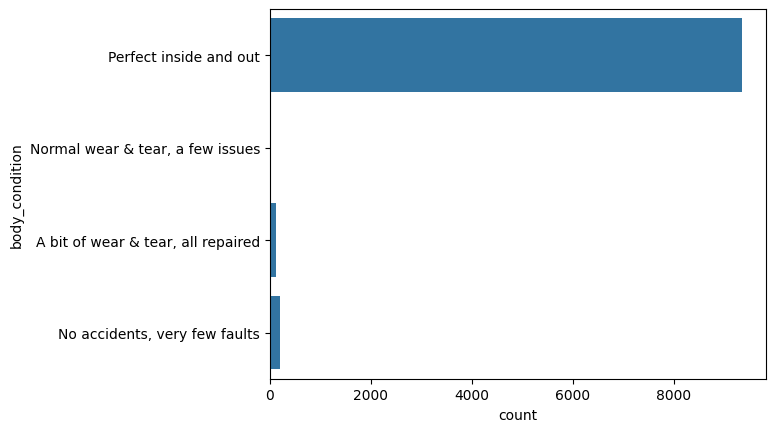

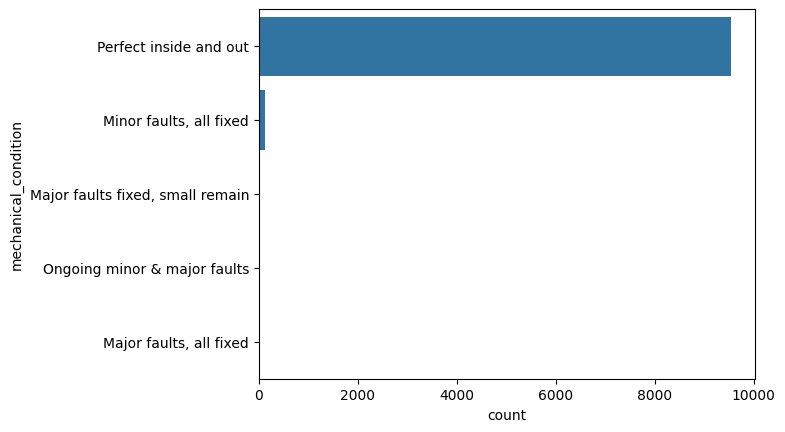

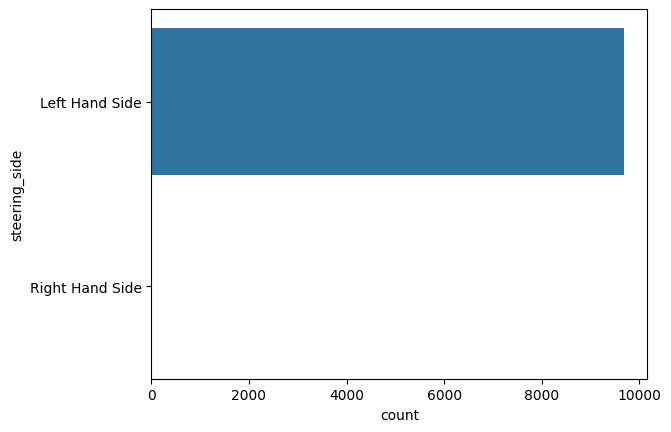

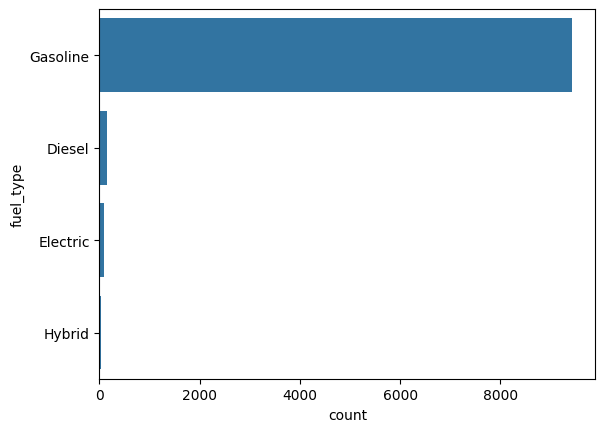

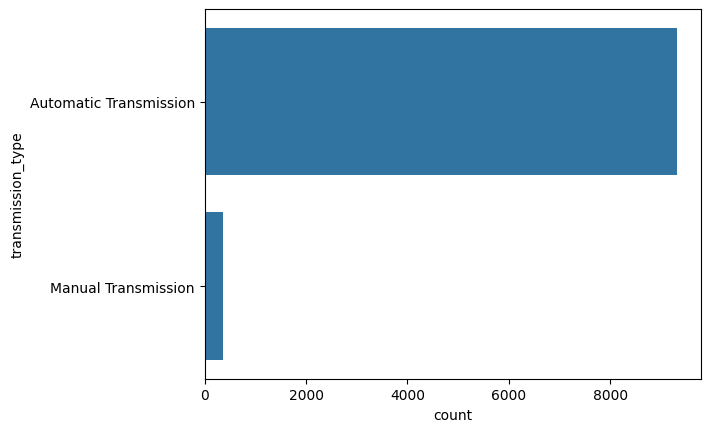

<Figure size 640x480 with 0 Axes>

In [45]:
for x in inbalanced_columns:
    sns.countplot(data=df,y=df[x])
    plt.figure() #this creates a new figure on which 

In [46]:
df.drop(inbalanced_columns,axis=1,inplace=True)

In [47]:
df.drop('index',inplace=True,axis=1)

In [48]:
df['color'].value_counts()

White          3242
Black          2037
Grey           1287
Silver          820
Blue            690
Red             587
Gold            246
Brown           236
Green           138
Other Color      77
Yellow           76
Orange           75
Beige            72
Burgundy         69
Purple           23
Teal              8
Tan               5
Name: color, dtype: int64

<Axes: xlabel='count', ylabel='color'>

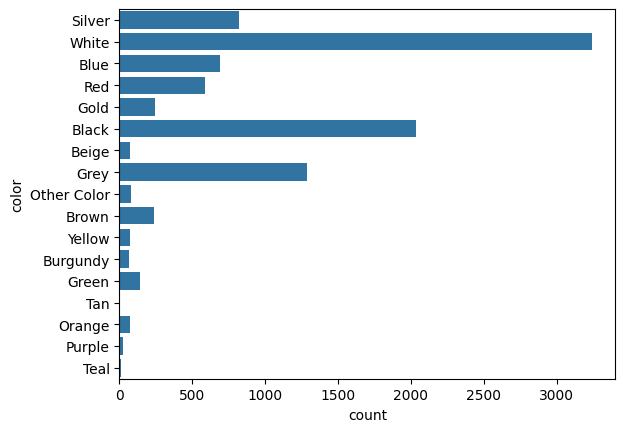

In [49]:
sns.countplot(y=df['color'])

In [50]:
df.drop(df[(df['color']=='Purple') | (df['color']=='Teal') |(df['color']=='Tan') ].index,inplace=True,axis=0)

<Axes: xlabel='count', ylabel='color'>

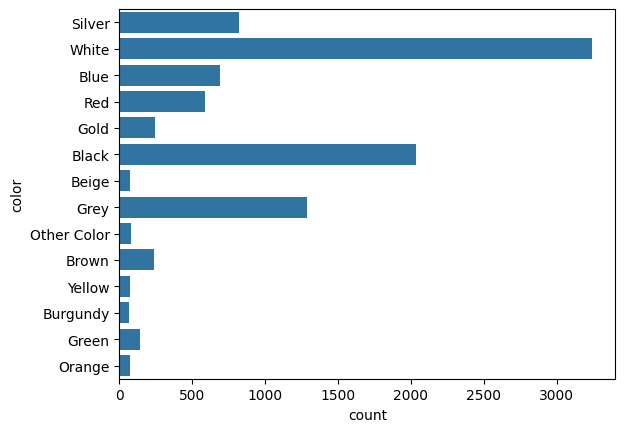

In [51]:
sns.countplot(y=df['color'])

In [52]:
df.shape

(9652, 14)

## I need to make some Bivariate Analysis between price_in_aed and kilometers To show if outliers will evect the corelation bentween them or not 

In [53]:
# befor removing outliers corr=-0.2
df.corr()

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1151602258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price_in_aed,kilometers,year
price_in_aed,1.000000,-0.027969,0.258102
kilometers,-0.027969,1.000000,-0.055789
year,0.258102,-0.055789,1.000000


### befor removing outliers corr=-0.2 & 0.25

In [54]:
#df['kilometers'] = df['kilometers'].astype(int)

<Axes: xlabel='kilometers', ylabel='Density'>

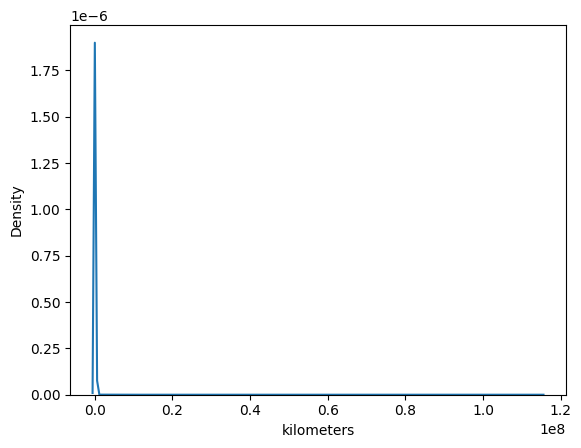

In [55]:
sns.kdeplot(df['kilometers'])

<Axes: ylabel='kilometers'>

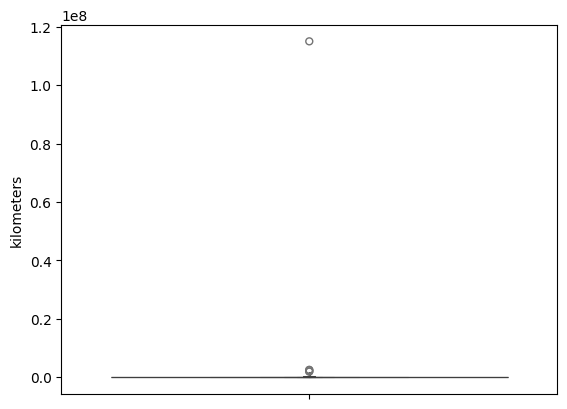

In [56]:
sns.boxenplot(df['kilometers'])

In [57]:
df[df['kilometers']>300000].index

Int64Index([ 156,  232,  429,  671,  685,  807,  878, 1071, 1083, 1157, 1184,
            1198, 1233, 1348, 1359, 1367, 1386, 1581, 1591, 1696, 1829, 1884,
            1943, 2028, 2245, 2489, 2541, 2579, 2662, 2733, 2837, 2953, 2958,
            2975, 3142, 3194, 3199, 3314, 3374, 3580, 3713, 3760, 3951, 4067,
            4119, 4142, 4168, 4207, 4442, 4542, 4616, 4991, 5125, 5146, 5173,
            5179, 5200, 5303, 5503, 5673, 5844, 5962, 6073, 6077, 6254, 6419,
            6447, 6453, 6599, 6687, 6758, 6868, 6902, 6908, 7024, 7241, 7382,
            7426, 7428, 7439, 7461, 7601, 7874, 7995, 8152, 8377, 8447, 8488,
            8527, 8579, 8591, 8623, 9107, 9198, 9451, 9592],
           dtype='int64')

In [58]:
df.drop(df[df['kilometers']>300000].index,inplace=True,axis=0)

In [59]:
df.shape

(9556, 14)

<Axes: xlabel='kilometers', ylabel='Density'>

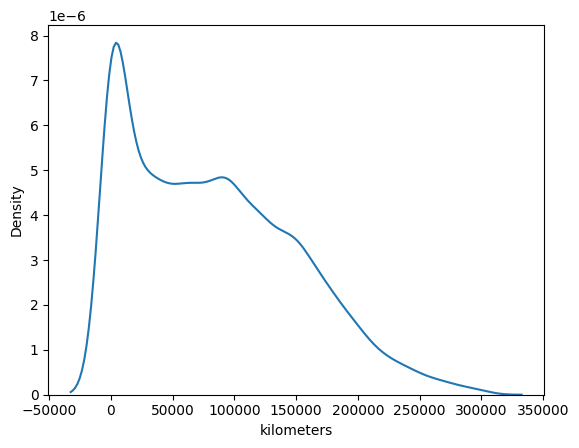

In [60]:
sns.kdeplot(df['kilometers'])

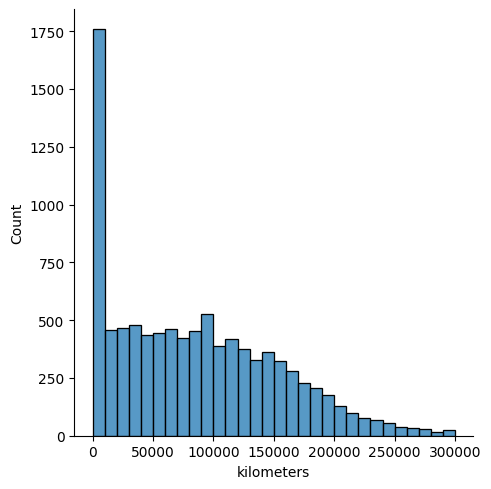

In [61]:
sns.displot(data=df,x='kilometers')

<Axes: ylabel='kilometers'>

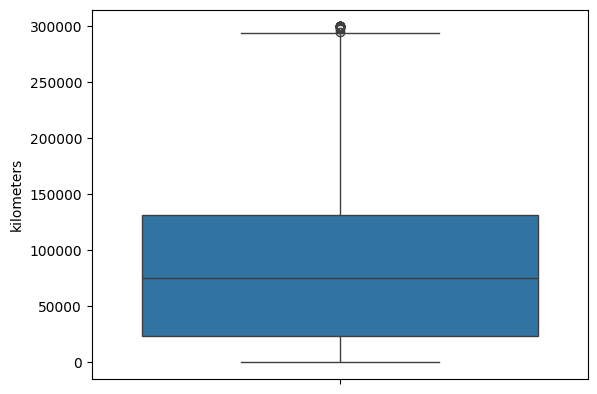

In [62]:
sns.boxplot(df['kilometers'])

#### I concluded form her that ther is many cars has never used becouse the kilometers=0

In [63]:
df.describe()

,price_in_aed,kilometers,year
count,9.556000e+03,9556.000000,9556.000000
mean,2.476148e+05,83712.565195,2016.064085
std,4.511864e+05,67699.011443,4.711132
min,8.900000e+03,0.000000,1953.000000
25%,5.200000e+04,23278.250000,2014.000000
50%,1.050000e+05,75328.000000,2017.000000
75%,2.350000e+05,131855.750000,2019.000000
max,1.499900e+07,300000.000000,2021.000000


In [64]:
df['year']=df['year'].astype(int)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9556 entries, 0 to 9687
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_in_aed     9556 non-null   int64  
 1   seller_type      9556 non-null   object 
 2   body_type        9556 non-null   object 
 3   no_of_cylinders  9556 non-null   object 
 4   regional_specs   9556 non-null   object 
 5   horsepower       9556 non-null   object 
 6   color            9556 non-null   object 
 7   emirate          9556 non-null   object 
 8   motors_trim      9556 non-null   object 
 9   company          9556 non-null   object 
 10  model            9556 non-null   object 
 11  date_posted      9556 non-null   object 
 12  kilometers       9556 non-null   float64
 13  year             9556 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 1.3+ MB


In [66]:
print(list(df['year'].value_counts()))

[1465, 948, 896, 890, 887, 883, 777, 714, 590, 373, 244, 207, 175, 161, 96, 69, 48, 27, 15, 12, 11, 9, 7, 5, 5, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


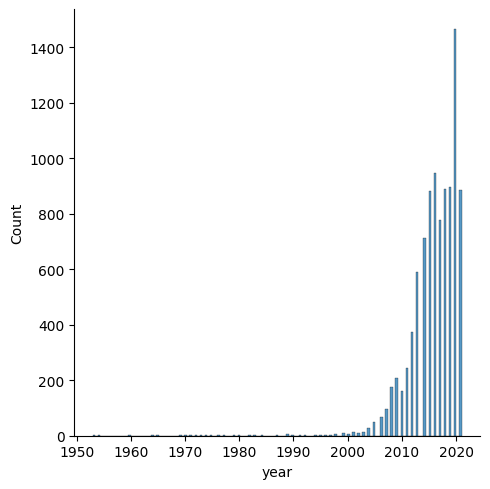

In [67]:
sns.displot(df['year'])

<Axes: ylabel='year'>

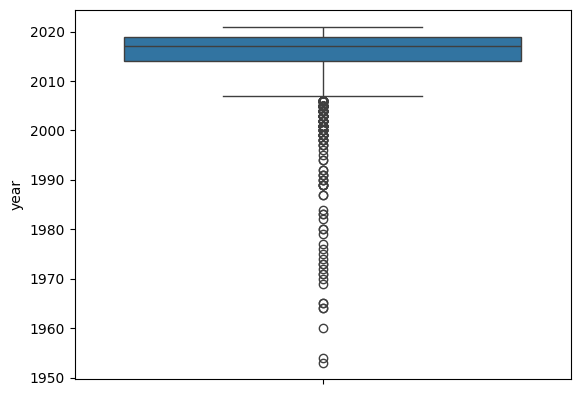

In [68]:
sns.boxplot(df['year'])

In [69]:
df[df['year']<=2005]

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,motors_trim,company,model,date_posted,kilometers,year
41,23000,Dealer,Sedan,8,North American Specs,200 - 300 HP,Black,Sharjah,1/2 Ultra,lexus,ls-series,12/05/2022,105000.0,2004
46,34000,Dealer,Sedan,8,Japanese Specs,200 - 300 HP,Black,Abu Dhabi,3/4 Ultra,lexus,ls-series,27/12/2021,89000.0,2004
94,105000,Dealer,SUV,8,Japanese Specs,200 - 300 HP,White,Dubai,G 500,mercedes-benz,g-class,04/01/2022,191000.0,2005
152,350000,Dealer,Hard Top Convertible,8,Other,200 - 300 HP,Black,Dubai,Other,chevrolet,corvette,28/10/2021,500.0,1960
172,265000,Dealer,Coupe,12,Japanese Specs,500 - 600 HP,Red,Dubai,Standard,ferrari,scaglietti,09/04/2022,82116.0,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,11500,Dealer,Sedan,8,European Specs,300 - 400 HP,White,Sharjah,1/2 Ultra,lexus,ls-series,12/05/2022,193000.0,1998
9354,21500,Owner,Sedan,8,North American Specs,300 - 400 HP,Black,Sharjah,3/4 Ultra,lexus,ls-series,26/04/2022,216852.0,2003
9363,23950,Owner,SUV,8,GCC Specs,200 - 300 HP,Silver,Dubai,Autobiography,land-rover,range-rover,11/05/2022,260000.0,2001
9611,365000,Owner,Sports Car,8,European Specs,300 - 400 HP,Yellow,Dubai,Other,ferrari,355,02/01/2022,25000.0,1998


In [70]:
df.drop(df[df['year']<=2005].index,inplace=True,axis=0)

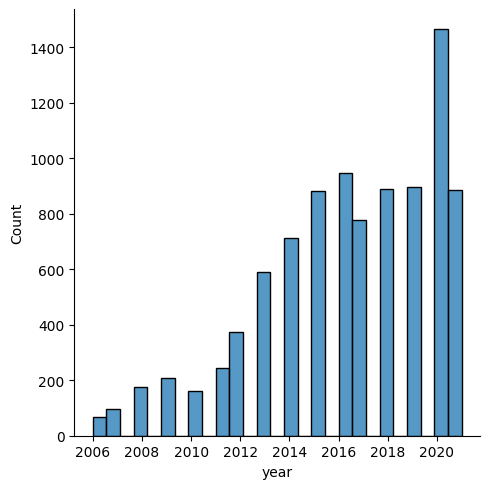

In [71]:
sns.displot(df['year'])

<Axes: ylabel='year'>

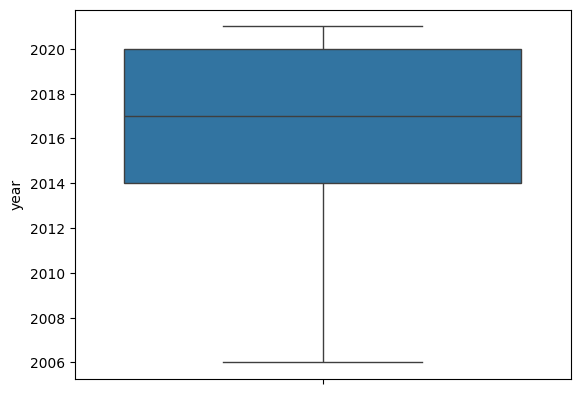

In [72]:
sns.boxplot(df['year'])

In [73]:
df.corr()

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price_in_aed,kilometers,year
price_in_aed,1.000000,-0.409229,0.288233
kilometers,-0.409229,1.000000,-0.666924
year,0.288233,-0.666924,1.000000


### after removing outliers corr=-0.4 &0.28
### so outliers have no meaning here

In [74]:
#sns.countplot(df['year'])

### Habdel body_type

<Axes: xlabel='count', ylabel='body_type'>

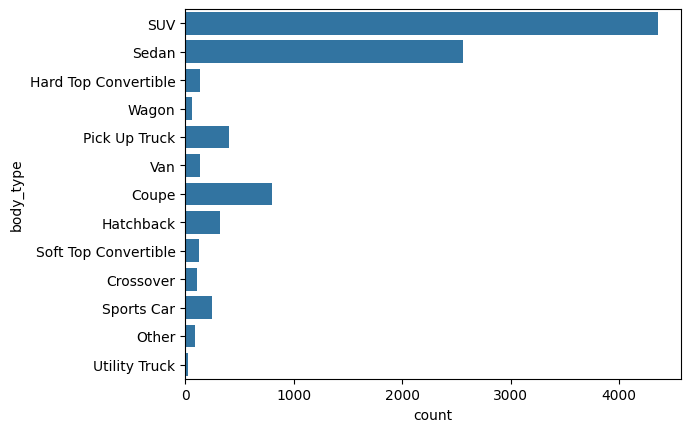

In [75]:
sns.countplot(data=df,y='body_type')

In [76]:
def Body_Type_(body_type):
    if body_type=='SUV' or body_type=='Sedan' or body_type=='Coupe':
        return body_type
    else:
        return 'Other'


In [77]:
df['body_type']=df['body_type'].apply(Body_Type_)

<Axes: xlabel='count', ylabel='body_type'>

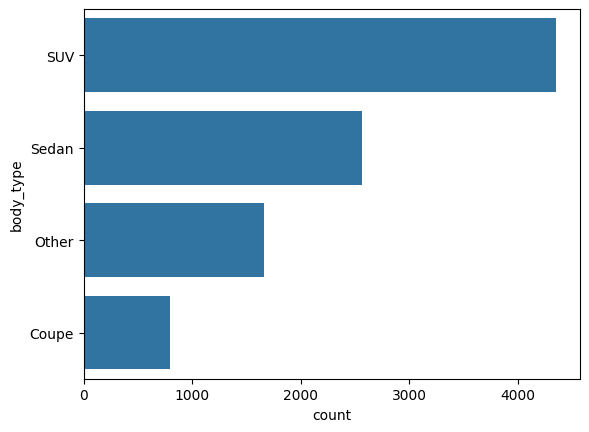

In [78]:
sns.countplot(df['body_type'])

### Handel no_of_cylinders

<Axes: xlabel='no_of_cylinders', ylabel='count'>

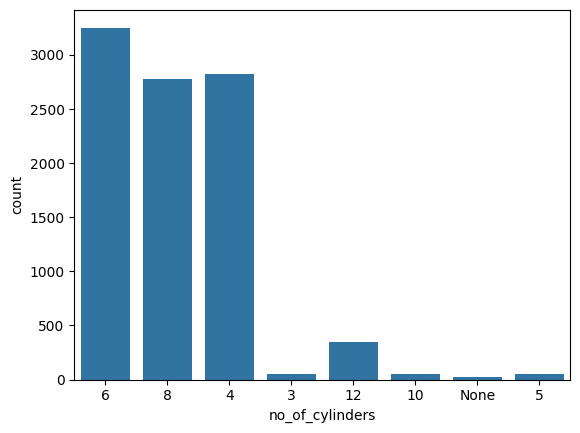

In [79]:
sns.countplot(data=df,x='no_of_cylinders')

#### Remove 3, 10, 5, None

In [80]:
not_important_no_of_cylinders_idx=df[(df['no_of_cylinders']=='3') | (df['no_of_cylinders']=='10') | (df['no_of_cylinders']=='5') | (df['no_of_cylinders']=='None')].index

In [81]:
df.drop(not_important_no_of_cylinders_idx,axis=0,inplace=True)

In [82]:
df['no_of_cylinders']=df['no_of_cylinders'].astype(int)

<Axes: xlabel='no_of_cylinders', ylabel='count'>

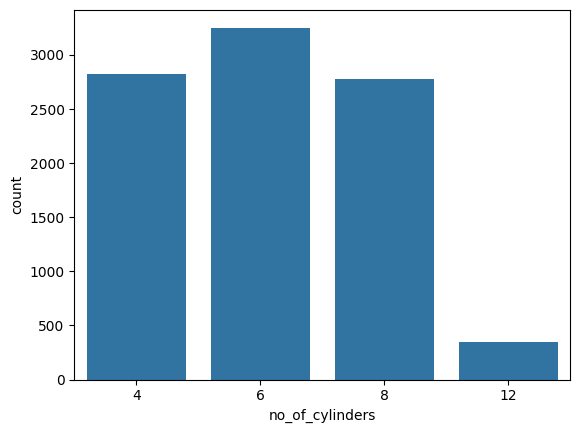

In [83]:
sns.countplot(data=df,x='no_of_cylinders')

In [84]:
#print(list(df['motors_trim'].unique()))

In [85]:
df.columns

Index(['price_in_aed', 'seller_type', 'body_type', 'no_of_cylinders',
       'regional_specs', 'horsepower', 'color', 'emirate', 'motors_trim',
       'company', 'model', 'date_posted', 'kilometers', 'year'],
      dtype='object')

In [86]:
col=['body_condition', 'mechanical_condition',
       'seller_type', 'body_type', 'no_of_cylinders', 'transmission_type',
       'regional_specs', 'horsepower', 'fuel_type', 'steering_side',
       'color', 'emirate']

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9199 entries, 0 to 9687
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_in_aed     9199 non-null   int64  
 1   seller_type      9199 non-null   object 
 2   body_type        9199 non-null   object 
 3   no_of_cylinders  9199 non-null   int32  
 4   regional_specs   9199 non-null   object 
 5   horsepower       9199 non-null   object 
 6   color            9199 non-null   object 
 7   emirate          9199 non-null   object 
 8   motors_trim      9199 non-null   object 
 9   company          9199 non-null   object 
 10  model            9199 non-null   object 
 11  date_posted      9199 non-null   object 
 12  kilometers       9199 non-null   float64
 13  year             9199 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 1006.1+ KB


In [89]:
df['company'].value_counts().head(23).index

Index(['mercedes-benz', 'nissan', 'toyota', 'bmw', 'land-rover', 'ford',
       'porsche', 'audi', 'jeep', 'dodge', 'lexus', 'chevrolet', 'mitsubishi',
       'hyundai', 'volkswagen', 'infiniti', 'rolls-royce', 'honda', 'bentley',
       'ferrari', 'kia', 'cadillac', 'gmc'],
      dtype='object')

In [90]:
df['company'].value_counts().sort_values().head(29)

maxus                   1
ssang-yong              1
dongfeng                1
westfield-sportscars    1
saab                    1
daihatsu                1
baic                    1
haval                   1
mercury                 1
jac                     1
levc                    1
rover                   1
foton                   1
polestar                2
acura                   2
citroen                 2
hummer                  2
morgan                  2
changan                 3
skoda                   3
gac                     3
mg                      4
other-make              4
jetour                  4
mercedes-maybach        5
geely                   5
opel                    6
genesis                 6
isuzu                   8
Name: company, dtype: int64

In [91]:
other_companies=df['company'].value_counts().sort_values().head(29).index
other_companies=list(other_companies)

In [92]:
def Handel_Companies(company):
    for c in range(len(other_companies)):
        if company==other_companies[c]:
            return 'other'
    return company

In [93]:
df['company']=df['company'].apply(Handel_Companies)

In [95]:
df['company'].value_counts()

mercedes-benz    1396
nissan            835
toyota            774
bmw               635
land-rover        559
ford              526
porsche           372
audi              340
jeep              305
dodge             297
lexus             276
chevrolet         270
mitsubishi        254
hyundai           196
volkswagen        195
infiniti          170
rolls-royce       164
honda             148
bentley           143
ferrari           128
kia               122
cadillac          121
gmc               115
jaguar             93
maserati           90
mazda              76
other              74
renault            69
lamborghini        67
mini               59
lincoln            58
peugeot            40
aston-martin       29
suzuki             29
maybach            28
tesla              27
mclaren            26
volvo              23
alfa-romeo         21
fiat               14
chrysler           14
subaru             11
lotus              10
Name: company, dtype: int64

In [96]:
#df.groupby('company').sum()

In [97]:
df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Dubai,Standard,ferrari,488-spider,30/04/2022,27000.0,2018
4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Dubai,Standard,renault,dokker,13/05/2022,69000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015
9684,90000,Owner,SUV,8,GCC Specs,400 - 500 HP,White,Dubai,Platinum,cadillac,escalade,11/05/2022,55640.0,2014
9685,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009
9686,18900,Owner,Sedan,4,GCC Specs,150 - 200 HP,White,Dubai,LS,chevrolet,malibu,06/03/2022,140000.0,2013


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9199 entries, 0 to 9687
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_in_aed     9199 non-null   int64  
 1   seller_type      9199 non-null   object 
 2   body_type        9199 non-null   object 
 3   no_of_cylinders  9199 non-null   int32  
 4   regional_specs   9199 non-null   object 
 5   horsepower       9199 non-null   object 
 6   color            9199 non-null   object 
 7   emirate          9199 non-null   object 
 8   motors_trim      9199 non-null   object 
 9   company          9199 non-null   object 
 10  model            9199 non-null   object 
 11  date_posted      9199 non-null   object 
 12  kilometers       9199 non-null   float64
 13  year             9199 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(10)
memory usage: 1006.1+ KB


In [99]:
df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Dubai,Standard,ferrari,488-spider,30/04/2022,27000.0,2018
4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Dubai,Standard,renault,dokker,13/05/2022,69000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015
9684,90000,Owner,SUV,8,GCC Specs,400 - 500 HP,White,Dubai,Platinum,cadillac,escalade,11/05/2022,55640.0,2014
9685,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009
9686,18900,Owner,Sedan,4,GCC Specs,150 - 200 HP,White,Dubai,LS,chevrolet,malibu,06/03/2022,140000.0,2013


In [100]:
df['horsepower'].value_counts()

200 - 300 HP        2987
300 - 400 HP        2062
400 - 500 HP        1202
150 - 200 HP        1118
500 - 600 HP         963
600 - 700 HP         345
Less than 150 HP     336
700 - 800 HP         143
800 - 900 HP          29
900+ HP               14
Name: horsepower, dtype: int64

In [101]:
def Horsepower (horsepower):
    if horsepower == '700 - 800 HP' or horsepower == '800 - 900 HP' or horsepower == '900+ HP':
        return 'More than 700'
    else:
        return horsepower

In [102]:
df['horsepower']=df['horsepower'].apply(Horsepower)

In [103]:
df['horsepower'].value_counts()

200 - 300 HP        2987
300 - 400 HP        2062
400 - 500 HP        1202
150 - 200 HP        1118
500 - 600 HP         963
600 - 700 HP         345
Less than 150 HP     336
More than 700        186
Name: horsepower, dtype: int64

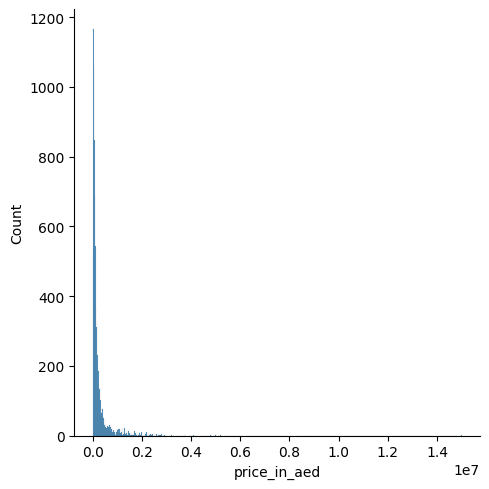

In [105]:
sns.displot(data=df,x=df['price_in_aed'])

<Axes: xlabel='price_in_aed'>

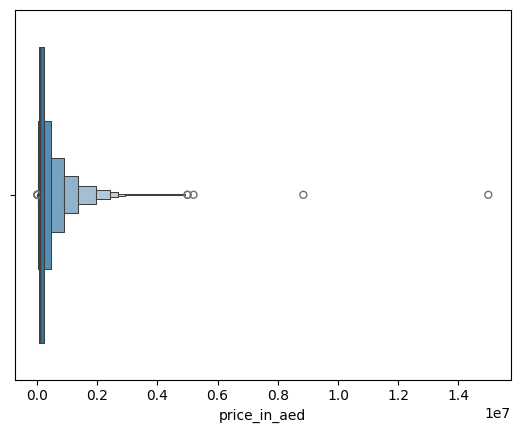

In [106]:
sns.boxenplot(data=df,x=df['price_in_aed'])

In [107]:
df[df['price_in_aed']>1500000].index

Int64Index([  86,   98,  170,  237,  238,  280,  282,  292,  312,  316,
            ...
            9301, 9444, 9467, 9477, 9485, 9529, 9540, 9568, 9588, 9657],
           dtype='int64', length=237)

In [108]:
x=df.drop(df[df['price_in_aed']>1500000].index)

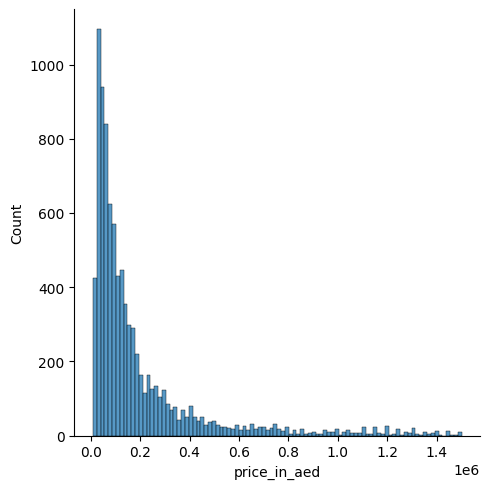

In [109]:
sns.displot(data=x,x=x['price_in_aed'])

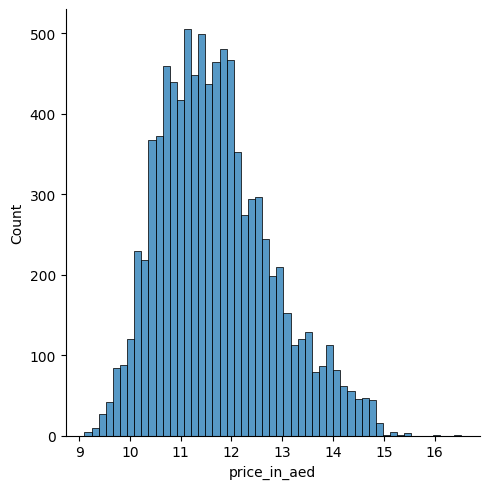

In [110]:
sns.displot(np.log(df['price_in_aed']))

In [111]:
df.describe()

,price_in_aed,no_of_cylinders,kilometers,year
count,9.199000e+03,9199.000000,9199.000000,9199.000000
mean,2.487859e+05,6.213067,83313.905533,2016.344494
std,4.533168e+05,1.933173,67404.561418,3.576628
min,8.999000e+03,4.000000,0.000000,2006.000000
25%,5.350000e+04,4.000000,23000.000000,2014.000000
50%,1.050000e+05,6.000000,75000.000000,2017.000000
75%,2.350000e+05,8.000000,130910.000000,2020.000000
max,1.499900e+07,12.000000,300000.000000,2021.000000


In [112]:
df.corr()

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price_in_aed,no_of_cylinders,kilometers,year
price_in_aed,1.000000,0.468801,-0.406673,0.288266
no_of_cylinders,0.468801,1.000000,-0.097202,-0.066689
kilometers,-0.406673,-0.097202,1.000000,-0.667881
year,0.288266,-0.066689,-0.667881,1.000000


In [113]:
x.corr()

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\2976989851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,price_in_aed,no_of_cylinders,kilometers,year
price_in_aed,1.000000,0.432120,-0.494350,0.382175
no_of_cylinders,0.432120,1.000000,-0.036847,-0.120489
kilometers,-0.494350,-0.036847,1.000000,-0.669188
year,0.382175,-0.120489,-0.669188,1.000000


In [114]:
#df.drop('date_posted',inplace=True,axis=1)

## Here we can descover when removin outliers from the target it incres the corr so outliers here have no sens

In [115]:
df=x
df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Dubai,Standard,ferrari,488-spider,30/04/2022,27000.0,2018
4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Dubai,Standard,renault,dokker,13/05/2022,69000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9683,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015
9684,90000,Owner,SUV,8,GCC Specs,400 - 500 HP,White,Dubai,Platinum,cadillac,escalade,11/05/2022,55640.0,2014
9685,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009
9686,18900,Owner,Sedan,4,GCC Specs,150 - 200 HP,White,Dubai,LS,chevrolet,malibu,06/03/2022,140000.0,2013


In [116]:
df.describe()

,price_in_aed,no_of_cylinders,kilometers,year
count,8.962000e+03,8962.000000,8962.000000,8962.000000
mean,1.944533e+05,6.106226,85392.591497,2016.270587
std,2.517581e+05,1.812395,67038.603709,3.553485
min,8.999000e+03,4.000000,0.000000,2006.000000
25%,5.200000e+04,4.000000,27000.000000,2014.000000
50%,1.000000e+05,6.000000,78906.500000,2017.000000
75%,2.150000e+05,8.000000,133000.000000,2019.000000
max,1.500000e+06,12.000000,300000.000000,2021.000000


In [117]:
df.head(1)

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,emirate,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013


# Bivariate Analysis

## relatiob between 

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

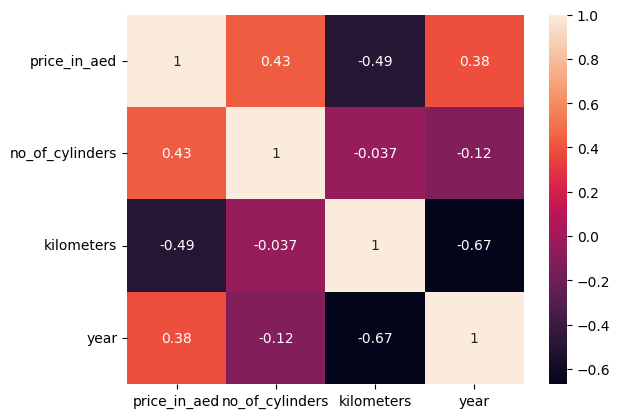

In [118]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='price_in_aed', ylabel='year'>

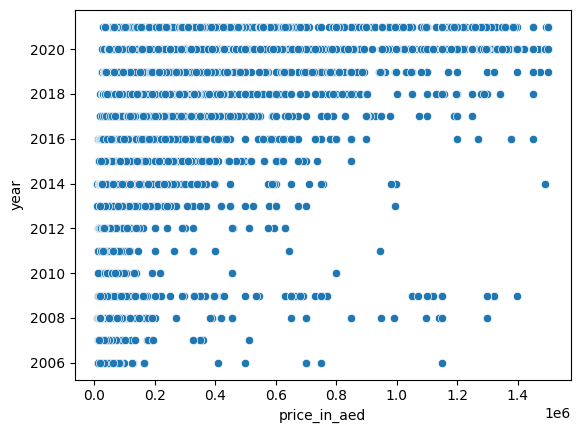

In [119]:
sns.scatterplot(x=df['price_in_aed'],y=df['year'])

<Axes: xlabel='kilometers', ylabel='price_in_aed'>

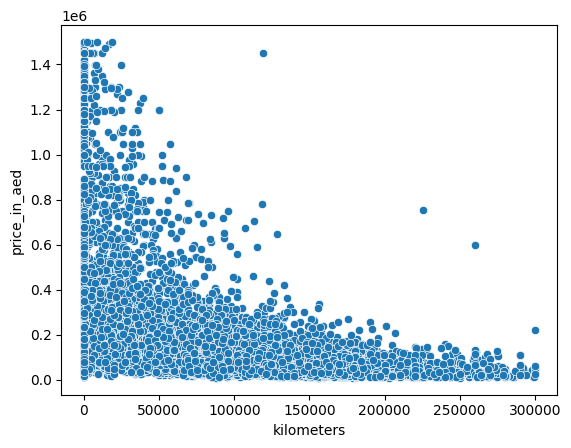

In [120]:
sns.scatterplot(y=df['price_in_aed'],x=df['kilometers'])

<Axes: xlabel='price_in_aed', ylabel='no_of_cylinders'>

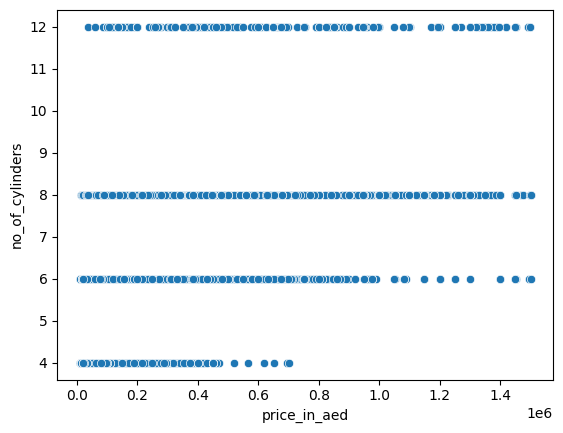

In [121]:
sns.scatterplot(x=df['price_in_aed'],y=df['no_of_cylinders'])

<Axes: xlabel='price_in_aed', ylabel='no_of_cylinders'>

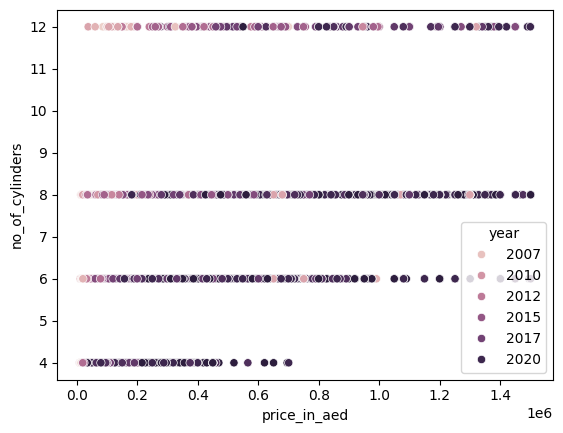

In [122]:
sns.scatterplot(x=df['price_in_aed'],y=df['no_of_cylinders'],hue=df['year'])

<Axes: xlabel='price_in_aed', ylabel='no_of_cylinders'>

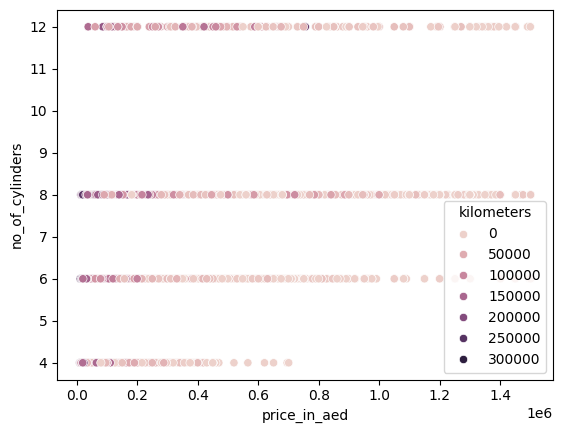

In [123]:
sns.scatterplot(x=df['price_in_aed'],y=df['no_of_cylinders'],hue=df['kilometers'])

<Axes: xlabel='kilometers', ylabel='year'>

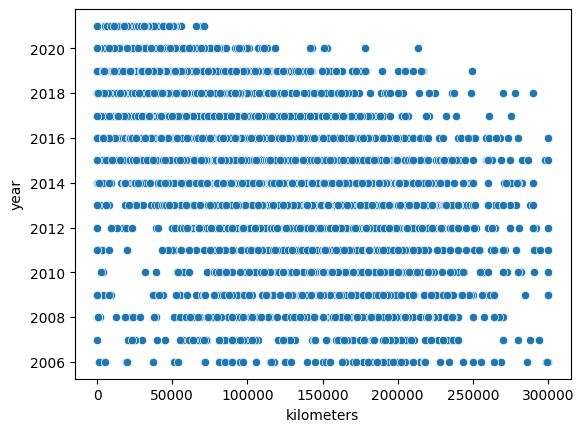

In [124]:
sns.scatterplot(y=df['year'],x=df['kilometers'])

In [125]:
df.corr()

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price_in_aed,no_of_cylinders,kilometers,year
price_in_aed,1.000000,0.432120,-0.494350,0.382175
no_of_cylinders,0.432120,1.000000,-0.036847,-0.120489
kilometers,-0.494350,-0.036847,1.000000,-0.669188
year,0.382175,-0.120489,-0.669188,1.000000


In [126]:
df.drop('emirate',inplace=True,axis=1)

In [127]:
df['motors_trim'].value_counts()

Other         1850
Standard       328
SE             218
S              213
G 63 AMG       175
              ... 
SGL MT           1
GTS RS           1
EX-L V-6         1
RST              1
2500HD LTZ       1
Name: motors_trim, Length: 820, dtype: int64

In [128]:
#df.drop('motors_trim',inplace=True,axis=1)

In [130]:
df.describe()

,price_in_aed,no_of_cylinders,kilometers,year
count,8.962000e+03,8962.000000,8962.000000,8962.000000
mean,1.944533e+05,6.106226,85392.591497,2016.270587
std,2.517581e+05,1.812395,67038.603709,3.553485
min,8.999000e+03,4.000000,0.000000,2006.000000
25%,5.200000e+04,4.000000,27000.000000,2014.000000
50%,1.000000e+05,6.000000,78906.500000,2017.000000
75%,2.150000e+05,8.000000,133000.000000,2019.000000
max,1.500000e+06,12.000000,300000.000000,2021.000000


In [131]:
df.head(2)

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018


In [132]:
df.reset_index()

,index,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
0,0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
1,1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018
2,2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
3,3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Standard,ferrari,488-spider,30/04/2022,27000.0,2018
4,4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Standard,renault,dokker,13/05/2022,69000.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8957,9683,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015
8958,9684,90000,Owner,SUV,8,GCC Specs,400 - 500 HP,White,Platinum,cadillac,escalade,11/05/2022,55640.0,2014
8959,9685,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009
8960,9686,18900,Owner,Sedan,4,GCC Specs,150 - 200 HP,White,LS,chevrolet,malibu,06/03/2022,140000.0,2013


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8962 entries, 0 to 9687
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_in_aed     8962 non-null   int64  
 1   seller_type      8962 non-null   object 
 2   body_type        8962 non-null   object 
 3   no_of_cylinders  8962 non-null   int32  
 4   regional_specs   8962 non-null   object 
 5   horsepower       8962 non-null   object 
 6   color            8962 non-null   object 
 7   motors_trim      8962 non-null   object 
 8   company          8962 non-null   object 
 9   model            8962 non-null   object 
 10  date_posted      8962 non-null   object 
 11  kilometers       8962 non-null   float64
 12  year             8962 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(9)
memory usage: 1.1+ MB


In [134]:
df.reset_index(inplace=True,drop=True)

# Lets Answer Business Questions

## 1- most 10 companies have seles
## 2- for most 10 companies have seles what is the common 5 models

## 3- most 10 high price companies regardless othr factors
## 4- most 10 high price companies in a category of 200-300 horsepower
## 5- most 10 high price companies at duration  of 2010-2015 

## 6- Best selling body_type at GCC Specs (regional_specs)

## 7- most 10 models have seles
## 8- most 10 high price models and its cmopany
## 9- most 10 high price models and its cmopany in a category of 200-500 horsepower
## 10- most 10 models that spend 0 kilometers and its data
## 11- most freq regional_specs that that cars spend 0 kilometers


## 12- according to ouner what is most 2 body_types seles
## 13- according to ouner what is most 10 models sales and its data
## 14- according to dealer what is most 10 models sales and its data

## 15- most 5 high price colors Under the average kilometers
## 16-  most 10 motors_trim have seles

## 17-  For each body_type for each seller_type which has most sales
## 18-  For each body_type for each no_of_cylinders which has most sales
## 19-  For each seller_type for each no_of_cylinders which has most sales
## 20-  For each seller_type for each horsepower which has most sales
## 21-  For each body_type for each horsepower which has most salesbody_type
## 22-  For each horsepower for each no_of_cylinders which has most salesbody_type
## 23-  For each seller_type how much kilometers driven
## 24- For each seller_type how much kilometers driven in average

## 25- For each body_type how much kilometers driven
## 26- For each body_type how much kilometers driven in average
## 27- For each seller_type for each body_type how much kilometers driven
## 28- For each seller_type for each body_type how much kilometers driven in average
## 29- For each body_type for each no_of_cylinders calculate the sum of kilometers driven
## 30- For each body_type for each no_of_cylinders calculate the sum of kilometers driven in average



## 1- most 10 companies have seles

In [135]:
df['company'].value_counts().head(10)

mercedes-benz    1361
nissan            835
toyota            774
bmw               635
land-rover        558
ford              526
porsche           370
audi              340
jeep              305
dodge             297
Name: company, dtype: int64

In [136]:
most_10_companies_idx=df['company'].value_counts().head(10).index

In [137]:
most_10_companies_df=df[df['company'].isin(most_10_companies_idx)]

In [138]:
most_10_companies_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
5,98000,Owner,Sedan,6,GCC Specs,200 - 300 HP,Gold,S-line,audi,a7,30/04/2022,84000.0,2015
6,257000,Dealer,SUV,8,GCC Specs,200 - 300 HP,Black,SRT,jeep,grand-cherokee,20/03/2022,68000.0,2019
8,149000,Dealer,Other,6,GCC Specs,200 - 300 HP,Beige,70th Anniversary,toyota,land-cruiser-76-series,11/05/2022,0.0,2020
9,35999,Dealer,Other,6,North American Specs,200 - 300 HP,Silver,SV,nissan,quest,07/08/2021,111749.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953,19500,Owner,SUV,6,GCC Specs,150 - 200 HP,Blue,HSE,land-rover,lr3,10/04/2022,135000.0,2008
8955,385000,Dealer,Sedan,6,Other,500 - 600 HP,Grey,CLS 53 AMG,mercedes-benz,cls-class,02/04/2022,11000.0,2021
8957,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015
8959,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009


<Axes: xlabel='count', ylabel='company'>

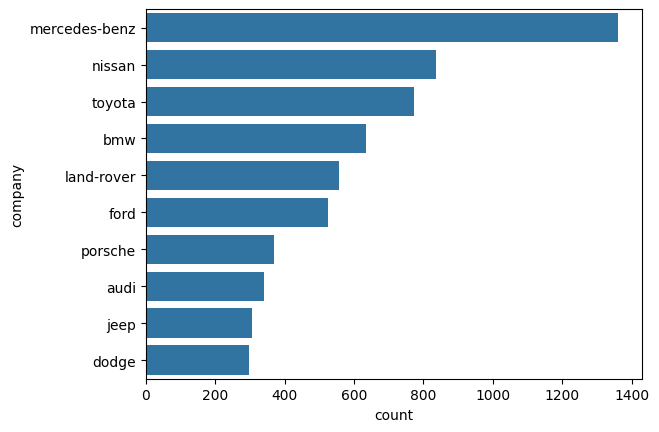

In [139]:
sns.countplot(data=most_10_companies_df,y=most_10_companies_df['company'],order=most_10_companies_idx)

## 2- for most 10 companies have seles what is the common 5 models


In [140]:
most_10_companies_df['model'].value_counts().head(5)

patrol               375
s-class              229
g-class              220
range-rover-sport    206
c-class              184
Name: model, dtype: int64

In [141]:
most_5_models_in_most_10_companies_have_seles_idx=most_10_companies_df['model'].value_counts().head(5).index

In [142]:
most_5_models_in_most_10_companies_have_seles_df=most_10_companies_df[most_10_companies_df['model'].isin(most_5_models_in_most_10_companies_have_seles_idx)]

In [143]:
most_5_models_in_most_10_companies_have_seles_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
11,750000,Dealer,SUV,8,GCC Specs,500 - 600 HP,Silver,G 63 AMG,mercedes-benz,g-class,12/04/2022,96000.0,2020
29,1090000,Dealer,Other,8,GCC Specs,500 - 600 HP,White,G 63 AMG,mercedes-benz,g-class,18/12/2021,0.0,2020
34,125000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Gold,Super Safari,nissan,patrol,18/04/2022,94000.0,2018
43,1149000,Dealer,SUV,8,European Specs,500 - 600 HP,Grey,G 63 AMG,mercedes-benz,g-class,27/03/2022,0.0,2020
47,980000,Dealer,SUV,8,European Specs,600 - 700 HP,White,G 63 AMG,mercedes-benz,g-class,13/04/2022,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,999000,Dealer,SUV,8,Other,500 - 600 HP,Grey,G 63 AMG,mercedes-benz,g-class,11/05/2022,51966.0,2019
8945,157000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Black,Super Safari,nissan,patrol,09/05/2022,19780.0,2020
8946,340000,Dealer,Sedan,8,GCC Specs,400 - 500 HP,Blue,S 560 4MATIC,mercedes-benz,s-class,19/03/2022,43096.0,2018
8951,330000,Dealer,SUV,6,GCC Specs,300 - 400 HP,Red,SE,land-rover,range-rover-sport,14/04/2022,37635.0,2018


<Axes: xlabel='model', ylabel='count'>

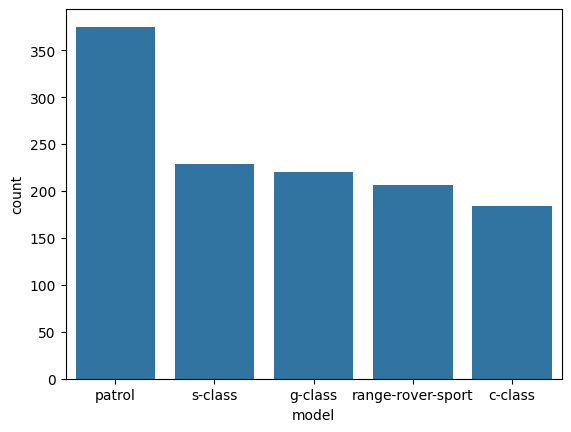

In [144]:
sns.countplot(data=most_5_models_in_most_10_companies_have_seles_df,x=most_5_models_in_most_10_companies_have_seles_df['model']
             ,order=most_5_models_in_most_10_companies_have_seles_idx)

## 3- most 10 high price companies regardless othr factors


In [145]:
df.groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1357273900.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]


,price_in_aed
company,
chrysler,673900
subaru,781799
fiat,953700
suzuki,1415480
volvo,1885799
peugeot,2134198
alfa-romeo,2363199
renault,2759899
lotus,3208000


## 4- most 10 high price companies in a category of 200-300 horsepower


In [146]:
df[df['horsepower']=='200 - 300 HP'].groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1699187028.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['horsepower']=='200 - 300 HP'].groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]


,price_in_aed
company,
fiat,185000
subaru,224400
lotus,250000
chrysler,355000
maserati,360500
suzuki,371000
peugeot,450399
renault,458900
volvo,1251300


## 5- most 10 high price companies at duration  of 2010-2015 


In [147]:
df[(df['year']<2015)&(df['year']>2010)].groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\4110354947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[(df['year']<2015)&(df['year']>2010)].groupby('company').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]


,price_in_aed
company,
subaru,24500
suzuki,50500
fiat,73000
chrysler,100500
renault,138900
peugeot,171299
lotus,250000
volvo,260499
mazda,421400


## 6- Best selling body_type at GCC Specs (regional_specs)


In [148]:
df[df['regional_specs']=='GCC Specs']['body_type'].value_counts().to_frame()

,body_type
SUV,3524
Sedan,1734
Other,1145
Coupe,566


## 7- most 10 models have seles


In [149]:
df['model'].value_counts().head(10).to_frame()

,model
patrol,375
s-class,237
g-class,220
range-rover-sport,206
c-class,184
land-cruiser,182
range-rover,178
e-class,171
pajero,143
charger,137


In [150]:
most_10_models_have_seles_idx=df['model'].value_counts().head(10).index

In [151]:
most_10_models_have_seles_df=df[df['model'].isin(most_10_models_have_seles_idx)]
most_10_models_have_seles_df.head()

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
11,750000,Dealer,SUV,8,GCC Specs,500 - 600 HP,Silver,G 63 AMG,mercedes-benz,g-class,12/04/2022,96000.0,2020
29,1090000,Dealer,Other,8,GCC Specs,500 - 600 HP,White,G 63 AMG,mercedes-benz,g-class,18/12/2021,0.0,2020
34,125000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Gold,Super Safari,nissan,patrol,18/04/2022,94000.0,2018


<Axes: xlabel='count', ylabel='model'>

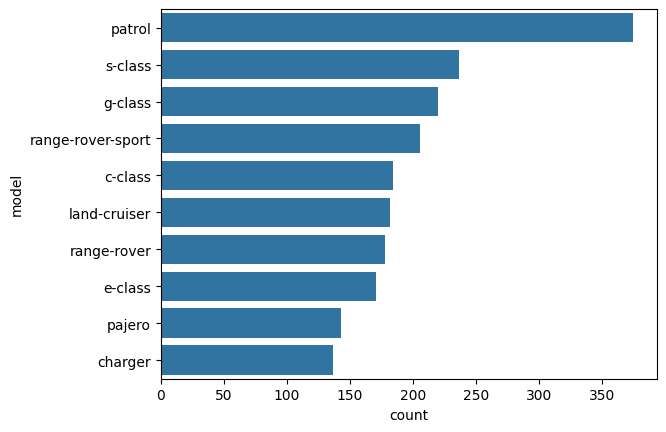

In [152]:
sns.countplot(data=most_10_models_have_seles_df,y=most_10_models_have_seles_df['model'],order=most_10_models_have_seles_idx)

## 8- most 10 high price models and its cmopany


In [153]:
df.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\3336375100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]


,price_in_aed
model,
emgrand-7,8999
optra,9900
i10,9999
206cc,11000
town-car,14000
emgrand-8,15000
s-type,15500
b-class,16000
scion,16900


In [154]:
most_10_high_price_models_idx=df.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']].index

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1875751271.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_10_high_price_models_idx=df.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']].index


In [155]:
most_10_high_price_models_df=df[df['model'].isin(most_10_high_price_models_idx)]
most_10_high_price_models_df[['model','company','price_in_aed']]

,model,company,price_in_aed
338,scion,toyota,16900
620,i10,hyundai,9999
1247,emgrand-8,other,15000
2123,optra,chevrolet,9900
2971,s-type,jaguar,15500
4631,206cc,peugeot,11000
7057,b-class,mercedes-benz,16000
7133,emgrand-7,other,8999
7923,carens,kia,17000
8469,town-car,lincoln,14000


## 9- most 10 high price models and its cmopany in a category of 200-500 horsepower


In [156]:
df_200_500_HP=df[(df['horsepower']=='200 - 300 HP')|(df['horsepower']=='400 - 500 HP')]

In [157]:
df_200_500_HP.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1893736790.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_200_500_HP.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']]


,price_in_aed
model,
206cc,11000
caprice,12500
town-car,14000
sonic,15000
208,15000
s-type,15500
b-class,16000
avalon,17000
duster,17000


In [158]:
most_10_high_price_models_idx=df_200_500_HP.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']].index

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\2656569119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_10_high_price_models_idx=df_200_500_HP.groupby('model').sum().sort_values(by='price_in_aed').head(10)[['price_in_aed']].index


In [159]:
most_10_high_price_models_df=df_200_500_HP[df_200_500_HP['model'].isin(most_10_high_price_models_idx)]
most_10_high_price_models_df[['model','company','price_in_aed']]

,model,company,price_in_aed
2971,s-type,jaguar,15500
3362,avalon,toyota,17000
4631,206cc,peugeot,11000
5156,gc6,other,18000
6081,caprice,chevrolet,12500
7012,208,peugeot,15000
7057,b-class,mercedes-benz,16000
8143,duster,renault,17000
8344,sonic,chevrolet,15000
8469,town-car,lincoln,14000


## 10- most 10 models that spend 0 kilometers


In [160]:
most_10_models_that_spend_0_km_idx=df[df['kilometers']==0.0]['model'].value_counts().head(10).index

In [161]:
df[df['kilometers']==0.0]['model'].value_counts().head(10)

land-cruiser    77
patrol          57
g-class         50
other           35
lx600           29
hilux           29
defender        17
s-class         17
bronco          14
id4             14
Name: model, dtype: int64

In [162]:
most_10_models_that_spend_0_km_df=df[df['model'].isin(most_10_models_that_spend_0_km_idx)]

In [163]:
most_10_models_that_spend_0_km_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
11,750000,Dealer,SUV,8,GCC Specs,500 - 600 HP,Silver,G 63 AMG,mercedes-benz,g-class,12/04/2022,96000.0,2020
26,160000,Dealer,Other,4,GCC Specs,150 - 200 HP,Black,Adventure,toyota,hilux,21/03/2022,0.0,2020
29,1090000,Dealer,Other,8,GCC Specs,500 - 600 HP,White,G 63 AMG,mercedes-benz,g-class,18/12/2021,0.0,2020
34,125000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Gold,Super Safari,nissan,patrol,18/04/2022,94000.0,2018
43,1149000,Dealer,SUV,8,European Specs,500 - 600 HP,Grey,G 63 AMG,mercedes-benz,g-class,27/03/2022,0.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,119000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Grey,SE,nissan,patrol,17/03/2022,116353.0,2017
8939,64000,Dealer,Other,4,GCC Specs,150 - 200 HP,White,Double Cab GL,toyota,hilux,27/02/2022,149327.0,2019
8941,999000,Dealer,SUV,8,Other,500 - 600 HP,Grey,G 63 AMG,mercedes-benz,g-class,11/05/2022,51966.0,2019
8945,157000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Black,Super Safari,nissan,patrol,09/05/2022,19780.0,2020


<Axes: xlabel='count', ylabel='model'>

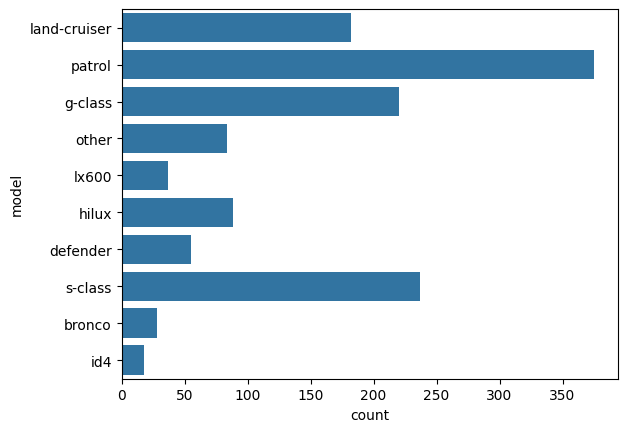

In [164]:
sns.countplot(data=most_10_models_that_spend_0_km_df,y=most_10_models_that_spend_0_km_df['model']
             ,order=most_10_models_that_spend_0_km_idx)

## 11- most freq regional_specs that that cars spend 0 kilometers


In [165]:
df[df['kilometers']==0.0]['regional_specs'].value_counts().to_frame()

,regional_specs
GCC Specs,433
Other,128
European Specs,98
North American Specs,11


## 12- according to Owner what is most 2 body_types seles


In [166]:
df[df['seller_type']=='Owner']['body_type'].value_counts().head(2)

SUV      1140
Sedan     818
Name: body_type, dtype: int64

## 13- according to Owner what is most 10 models seles and its data  


In [167]:
df[df['seller_type']=='Owner']['model'].value_counts().head(10)

patrol               98
c-class              60
pajero               55
charger              53
range-rover-sport    50
altima               48
s-class              45
x5                   43
cayenne              38
e-class              38
Name: model, dtype: int64

In [168]:
owner_most_10_models_seles_idx=df[df['seller_type']=='Owner']['model'].value_counts().head(10).index

In [169]:
owner_most_10_models_seles_df=df[df['model'].isin(owner_most_10_models_seles_idx)]

In [170]:
owner_most_10_models_seles_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
34,125000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Gold,Super Safari,nissan,patrol,18/04/2022,94000.0,2018
46,89000,Dealer,SUV,6,GCC Specs,300 - 400 HP,White,Xdrive50i,bmw,x5,15/03/2022,70000.0,2014
52,41500,Dealer,SUV,4,GCC Specs,200 - 300 HP,Grey,GLS,mitsubishi,pajero,01/04/2022,91000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,340000,Dealer,Sedan,8,GCC Specs,400 - 500 HP,Blue,S 560 4MATIC,mercedes-benz,s-class,19/03/2022,43096.0,2018
8948,115000,Dealer,Other,8,Japanese Specs,600 - 700 HP,White,E 63 AMG,mercedes-benz,e-class,27/04/2022,43000.0,2011
8949,279000,Dealer,SUV,8,GCC Specs,500 - 600 HP,Grey,X5M,bmw,x5,24/04/2022,33982.0,2018
8951,330000,Dealer,SUV,6,GCC Specs,300 - 400 HP,Red,SE,land-rover,range-rover-sport,14/04/2022,37635.0,2018


## 14- according to Dealer what is most 10 models seles and its data  


In [171]:
df[df['seller_type']=='Dealer']['model'].value_counts().head(10)

patrol               267
g-class              186
s-class              173
range-rover-sport    154
land-cruiser         145
range-rover          144
e-class              122
c-class              107
cayenne               91
carrera               90
Name: model, dtype: int64

In [172]:
Dealer_most_10_models_seles_idx=df[df['seller_type']=='Dealer']['model'].value_counts().head(10).index

In [173]:
Dealer_most_10_models_seles_df=df[df['model'].isin(Dealer_most_10_models_seles_idx)]

In [174]:
Dealer_most_10_models_seles_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014
11,750000,Dealer,SUV,8,GCC Specs,500 - 600 HP,Silver,G 63 AMG,mercedes-benz,g-class,12/04/2022,96000.0,2020
29,1090000,Dealer,Other,8,GCC Specs,500 - 600 HP,White,G 63 AMG,mercedes-benz,g-class,18/12/2021,0.0,2020
34,125000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Gold,Super Safari,nissan,patrol,18/04/2022,94000.0,2018
37,470000,Dealer,Coupe,6,GCC Specs,400 - 500 HP,Grey,GTS,porsche,carrera,18/11/2021,18347.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8946,340000,Dealer,Sedan,8,GCC Specs,400 - 500 HP,Blue,S 560 4MATIC,mercedes-benz,s-class,19/03/2022,43096.0,2018
8948,115000,Dealer,Other,8,Japanese Specs,600 - 700 HP,White,E 63 AMG,mercedes-benz,e-class,27/04/2022,43000.0,2011
8951,330000,Dealer,SUV,6,GCC Specs,300 - 400 HP,Red,SE,land-rover,range-rover-sport,14/04/2022,37635.0,2018
8957,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015


## 15- most 5 high price colors Under the average kilometers

In [175]:
under_avg_km_df=df[df['kilometers']<df['kilometers'].mean()]

In [176]:
df.groupby('color').sum().sort_values(by='price_in_aed',ascending=False)

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\3073462261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('color').sum().sort_values(by='price_in_aed',ascending=False)


,price_in_aed,no_of_cylinders,kilometers,year
color,,,,
White,518313540,18402,281199961.0,6198186
Black,454828815,12018,146561776.0,3788925
Grey,252188396,7284,92680229.0,2442422
Blue,132150022,3790,50064908.0,1256241
Red,100783979,3148,43474984.0,1060392
Silver,100777627,4396,73536297.0,1521583
Gold,43014683,1524,23790612.0,463437
Green,40651897,742,6830609.0,227930
Brown,24203590,1416,26734347.0,467387


## 16-  most 10 motors_trim have seles

In [177]:
df['motors_trim'].value_counts().head(10)

Other       1850
Standard     328
SE           218
S            213
G 63 AMG     175
Sport        145
HSE          128
Limited      125
GLS          117
SV           108
Name: motors_trim, dtype: int64

In [178]:
most_10_motors_trim_have_seles_idx=df['motors_trim'].value_counts().head(10).index

In [179]:
most_10_motors_trim_have_seles_df=df[df['motors_trim'].isin(most_10_motors_trim_have_seles_idx)]

In [180]:
most_10_motors_trim_have_seles_df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013
3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Standard,ferrari,488-spider,30/04/2022,27000.0,2018
4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Standard,renault,dokker,13/05/2022,69000.0,2020
7,82000,Dealer,Other,4,Other,200 - 300 HP,Silver,Other,mitsubishi,l200,15/02/2022,0.0,2020
9,35999,Dealer,Other,6,North American Specs,200 - 300 HP,Silver,SV,nissan,quest,07/08/2021,111749.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8937,34500,Dealer,Sedan,4,GCC Specs,150 - 200 HP,Black,S,nissan,altima,05/05/2022,169536.0,2015
8940,34000,Dealer,Other,4,GCC Specs,150 - 200 HP,White,Standard,renault,dokker,13/05/2022,31262.0,2021
8941,999000,Dealer,SUV,8,Other,500 - 600 HP,Grey,G 63 AMG,mercedes-benz,g-class,11/05/2022,51966.0,2019
8951,330000,Dealer,SUV,6,GCC Specs,300 - 400 HP,Red,SE,land-rover,range-rover-sport,14/04/2022,37635.0,2018


<Axes: xlabel='count', ylabel='motors_trim'>

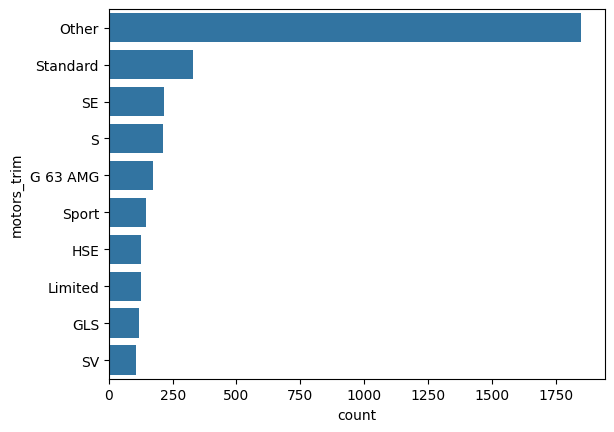

In [181]:
sns.countplot(data=most_10_motors_trim_have_seles_df,y=most_10_motors_trim_have_seles_df['motors_trim'],
             order=most_10_motors_trim_have_seles_idx)

## 17- For each body_type for each seller_type which has most sales


In [182]:
df['dumy']=1

In [183]:
df.pivot_table(columns='seller_type',index='body_type',values='dumy',aggfunc=sum)

seller_type,Dealer,Dealership/Certified Pre-Owned,Owner
body_type,,,
Coupe,512,29,209
Other,1059,34,443
SUV,2989,77,1140
Sedan,1559,93,818


<Axes: xlabel='seller_type', ylabel='count'>

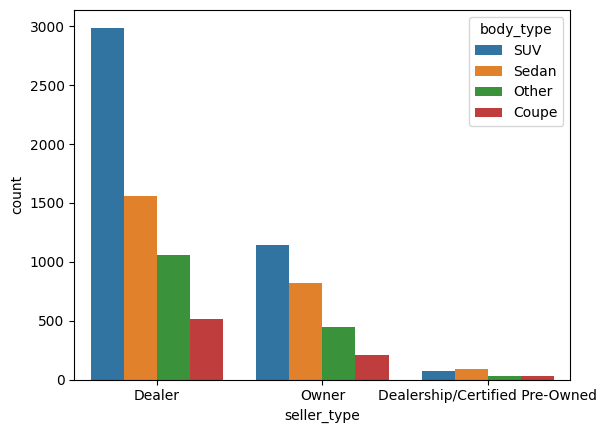

In [184]:
sns.countplot(data=df,x='seller_type',hue='body_type')

## 18-  For each body_type for each no_of_cylinders which has most sales

In [185]:
df.pivot_table(columns='body_type',index='no_of_cylinders',values='dumy',aggfunc=sum)

body_type,Coupe,Other,SUV,Sedan
no_of_cylinders,,,,
4,147,704,841,1135
6,288,401,1797,764
8,252,409,1541,474
12,63,22,27,97


<Axes: xlabel='body_type', ylabel='count'>

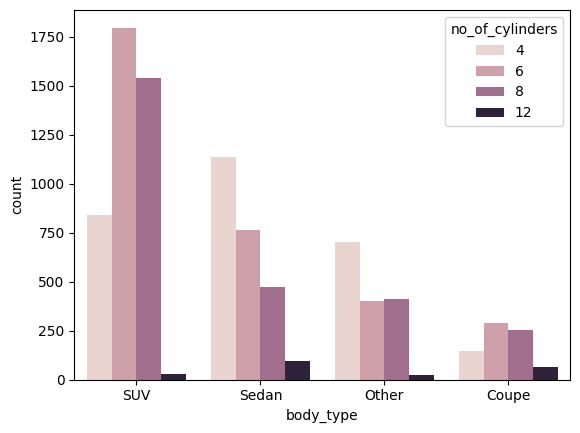

In [186]:
sns.countplot(data=df,x='body_type',hue='no_of_cylinders')

<Axes: ylabel='count'>

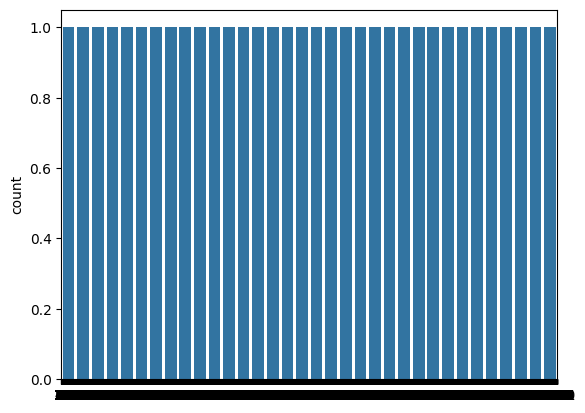

In [187]:
sns.countplot(df['no_of_cylinders'])

## 19-  For each seller_type for each no_of_cylinders which has most sales

In [188]:
df.pivot_table(columns='seller_type',index='no_of_cylinders',values='dumy',aggfunc=sum)

seller_type,Dealer,Dealership/Certified Pre-Owned,Owner
no_of_cylinders,,,
4,1769.0,89.0,969.0
6,2193.0,91.0,966.0
8,1973.0,53.0,650.0
12,184.0,NaN,25.0


<Axes: xlabel='seller_type', ylabel='count'>

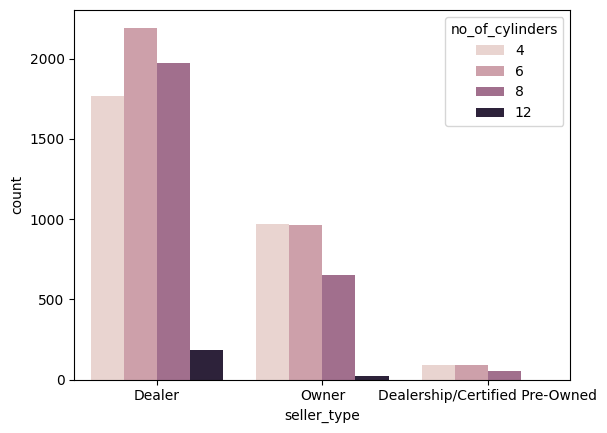

In [189]:
sns.countplot(data=df,x='seller_type',hue='no_of_cylinders')

## 20-  For each seller_type for each horsepower which has most sales


In [190]:
df.pivot_table(columns='seller_type',index='horsepower',values='dumy',aggfunc=sum)

seller_type,Dealer,Dealership/Certified Pre-Owned,Owner
horsepower,,,
150 - 200 HP,724,23,371
200 - 300 HP,1900,78,1007
300 - 400 HP,1398,64,599
400 - 500 HP,866,38,296
500 - 600 HP,698,22,157
600 - 700 HP,225,5,51
Less than 150 HP,235,2,99
More than 700,73,1,30


<Axes: xlabel='seller_type', ylabel='count'>

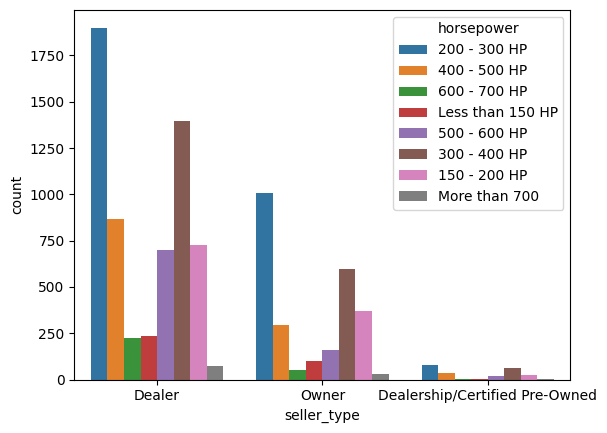

In [191]:
sns.countplot(data=df,x='seller_type',hue='horsepower')

<Axes: xlabel='count', ylabel='horsepower'>

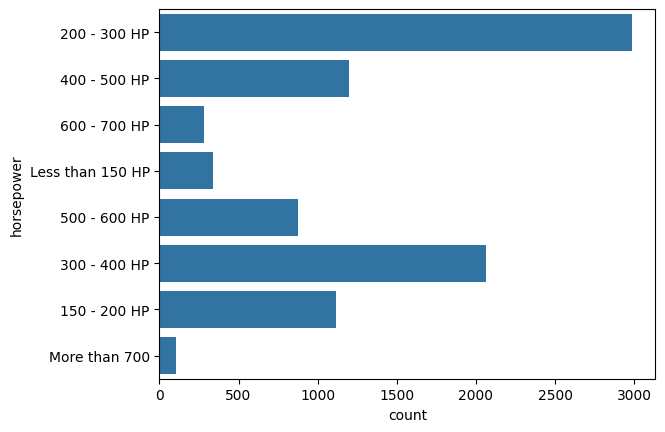

In [192]:
sns.countplot(y=df['horsepower'])

## 21-  For each body_type for each horsepower which has most salesbody_type


In [193]:
df.pivot_table(columns='body_type',index='horsepower',values='dumy',aggfunc=sum)

body_type,Coupe,Other,SUV,Sedan
horsepower,,,,
150 - 200 HP,40,255,389,434
200 - 300 HP,171,506,1456,852
300 - 400 HP,181,299,1085,496
400 - 500 HP,132,187,609,272
500 - 600 HP,118,109,469,181
600 - 700 HP,79,39,92,71
Less than 150 HP,2,103,79,152
More than 700,27,38,27,12


<Axes: xlabel='body_type', ylabel='count'>

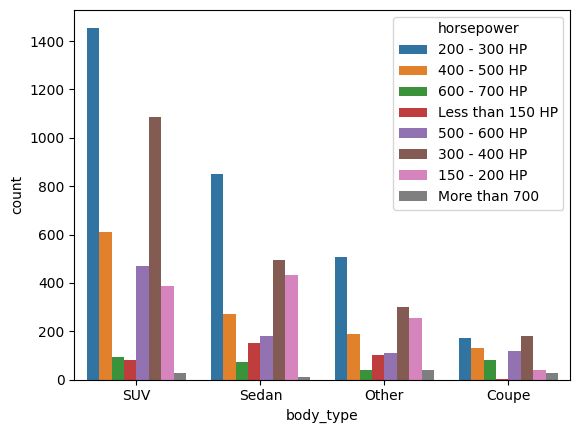

In [194]:
sns.countplot(data=df,x='body_type',hue='horsepower')

<Axes: xlabel='count', ylabel='body_type'>

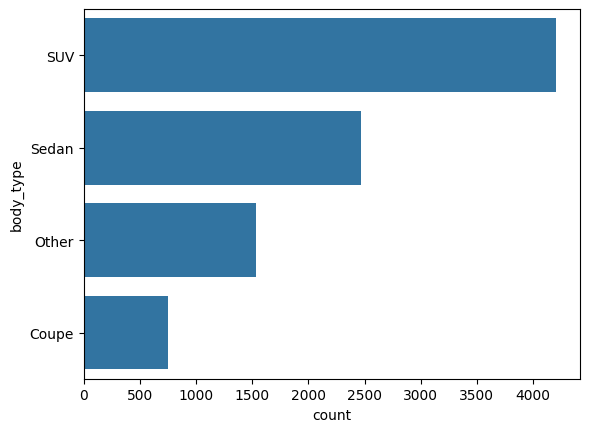

In [195]:
sns.countplot(df['body_type'])

## 22-  For each horsepower for each no_of_cylinders which has most salesbody_type


In [196]:
df.pivot_table(columns='horsepower',index='no_of_cylinders',values='dumy',aggfunc=sum)

horsepower,150 - 200 HP,200 - 300 HP,300 - 400 HP,400 - 500 HP,500 - 600 HP,600 - 700 HP,Less than 150 HP,More than 700
no_of_cylinders,,,,,,,,
4,970.0,1328.0,193.0,11.0,1.0,1.0,320.0,3.0
6,137.0,1396.0,1233.0,366.0,56.0,29.0,13.0,20.0
8,11.0,254.0,634.0,805.0,730.0,172.0,3.0,67.0
12,NaN,7.0,1.0,18.0,90.0,79.0,NaN,14.0


<Axes: xlabel='count', ylabel='horsepower'>

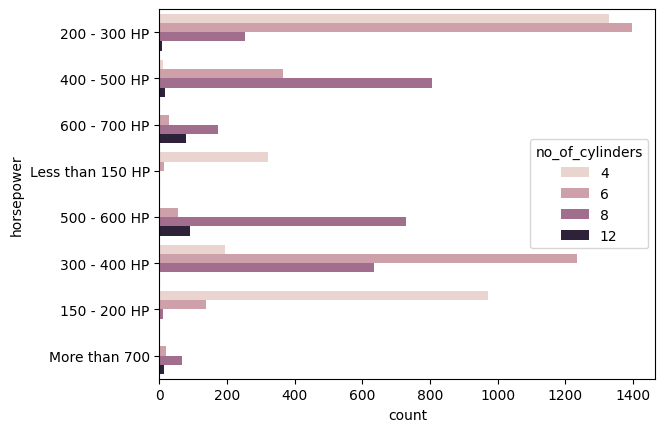

In [197]:
sns.countplot(data=df,y='horsepower',hue='no_of_cylinders')

<Axes: xlabel='count', ylabel='no_of_cylinders'>

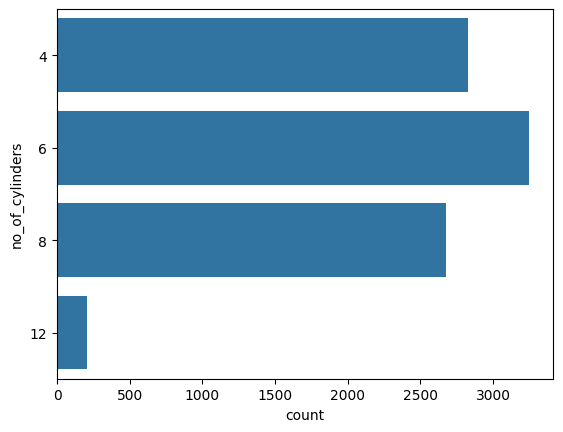

In [198]:
sns.countplot(y=df['no_of_cylinders'])

## 23- For each seller_type how much kilometers driven

In [199]:
df['seller_type'].value_counts().index

Index(['Dealer', 'Owner', 'Dealership/Certified Pre-Owned'], dtype='object')

<Axes: xlabel='seller_type', ylabel='kilometers'>

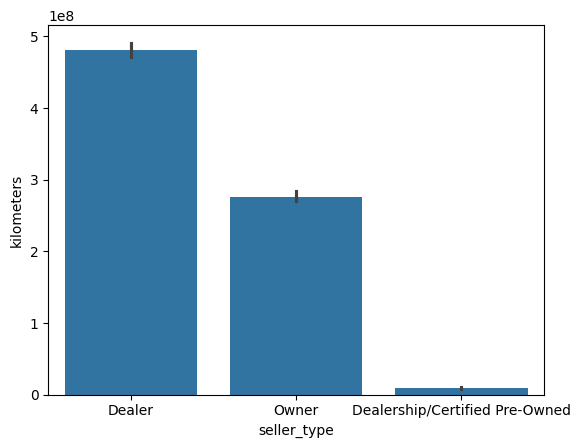

In [200]:
sns.barplot(data=df,x='seller_type',y='kilometers',estimator=sum )

In [201]:
df.groupby('seller_type').sum()[['kilometers']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\1269152802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('seller_type').sum()[['kilometers']]


,kilometers
seller_type,
Dealer,480464349.0
Dealership/Certified Pre-Owned,8822212.0
Owner,276001844.0


## 24- For each seller_type how much kilometers driven in average

<Axes: xlabel='seller_type', ylabel='kilometers'>

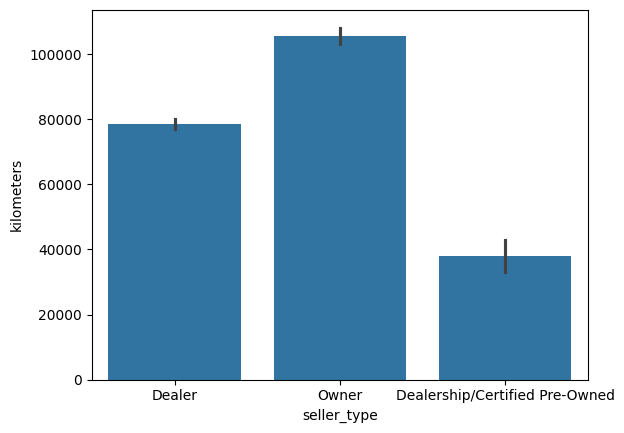

In [202]:
sns.barplot(data=df,x='seller_type',y='kilometers')

In [203]:
df.groupby('seller_type').mean()[['kilometers']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\899022488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('seller_type').mean()[['kilometers']]


,kilometers
seller_type,
Dealer,78520.076647
Dealership/Certified Pre-Owned,37863.570815
Owner,105747.832950


In [204]:
# conclulsion her is that owner type sell cars that drive more kilometers

## 25- For each body_type how much kilometers driven

<Axes: xlabel='body_type', ylabel='kilometers'>

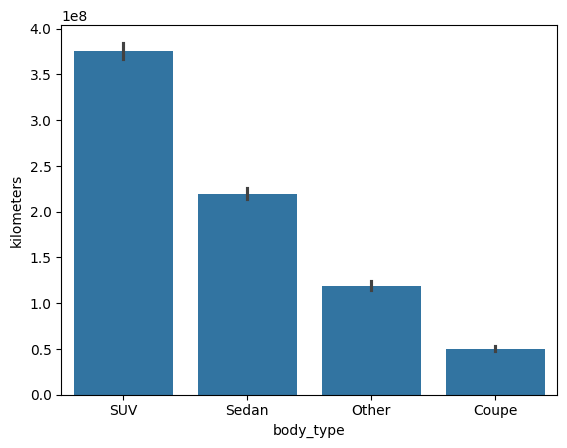

In [205]:
sns.barplot(data=df,x='body_type',y='kilometers',estimator=sum)

In [206]:
df.groupby('body_type').sum()[['kilometers']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\2748988626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('body_type').sum()[['kilometers']]


,kilometers
body_type,
Coupe,50287851.0
Other,119190725.0
SUV,376065675.0
Sedan,219744154.0


## 26- For each body_type how much kilometers driven in average

<Axes: xlabel='body_type', ylabel='kilometers'>

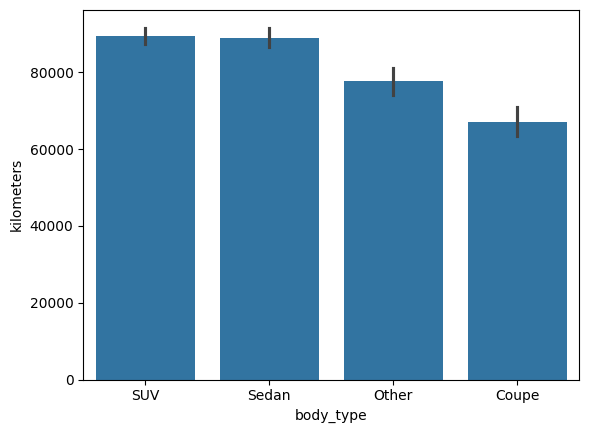

In [207]:
sns.barplot(data=df,x='body_type',y='kilometers')

In [208]:
df.groupby('body_type').mean()[['kilometers']]

C:\Users\Abdo Mostafa\AppData\Local\Temp\ipykernel_18420\167062232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('body_type').mean()[['kilometers']]


,kilometers
body_type,
Coupe,67050.468000
Other,77598.128255
SUV,89411.715407
Sedan,88965.244534


In [209]:
df

,price_in_aed,seller_type,body_type,no_of_cylinders,regional_specs,horsepower,color,motors_trim,company,model,date_posted,kilometers,year,dumy
0,26000,Dealer,SUV,6,GCC Specs,200 - 300 HP,Silver,GLS,mitsubishi,pajero,13/05/2022,167390.0,2013,1
1,110000,Dealer,SUV,8,North American Specs,400 - 500 HP,White,1500 High Country,chevrolet,silverado,14/01/2022,39000.0,2018,1
2,78000,Dealer,Sedan,6,GCC Specs,400 - 500 HP,Blue,E 300,mercedes-benz,e-class,05/05/2022,200000.0,2014,1
3,899000,Dealer,Other,8,GCC Specs,600 - 700 HP,Red,Standard,ferrari,488-spider,30/04/2022,27000.0,2018,1
4,33000,Owner,Other,4,GCC Specs,Less than 150 HP,White,Standard,renault,dokker,13/05/2022,69000.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8957,215000,Dealer,SUV,8,GCC Specs,500 - 600 HP,White,Autobiography,land-rover,range-rover,18/11/2021,105777.0,2015,1
8958,90000,Owner,SUV,8,GCC Specs,400 - 500 HP,White,Platinum,cadillac,escalade,11/05/2022,55640.0,2014,1
8959,679000,Dealer,SUV,8,Other,400 - 500 HP,Black,SVR,land-rover,range-rover-sport,14/12/2021,100.0,2009,1
8960,18900,Owner,Sedan,4,GCC Specs,150 - 200 HP,White,LS,chevrolet,malibu,06/03/2022,140000.0,2013,1


<Axes: xlabel='seller_type', ylabel='kilometers'>

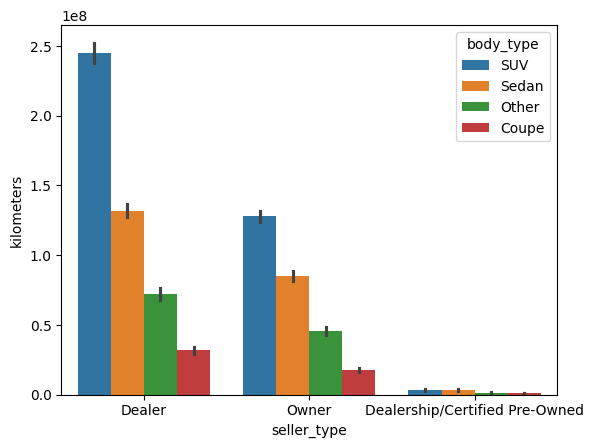

In [210]:
sns.barplot(data=df,x='seller_type',y='kilometers',hue=df['body_type'],estimator=sum)

In [211]:
df.pivot_table(columns='seller_type',index='body_type',values='kilometers',aggfunc=sum)

seller_type,Dealer,Dealership/Certified Pre-Owned,Owner
body_type,,,
Coupe,31633222.0,997054.0,17657575.0
Other,72388403.0,1320357.0,45481965.0
SUV,245102087.0,3081876.0,127881712.0
Sedan,131340637.0,3422925.0,84980592.0


## 28- For each seller_type for each body_type how much kilometers driven in average

<Axes: xlabel='seller_type', ylabel='kilometers'>

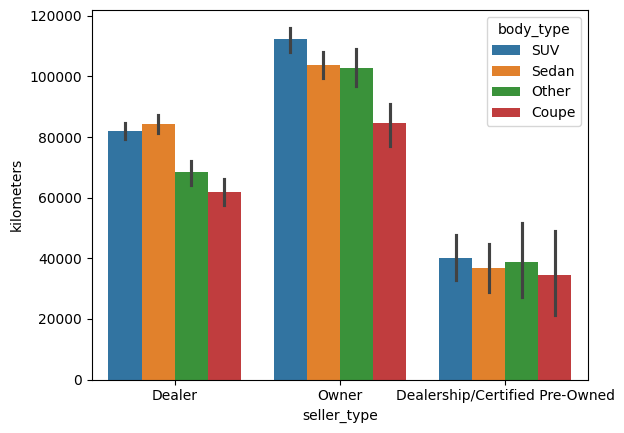

In [212]:
sns.barplot(data=df,x='seller_type',y='kilometers',hue=df['body_type'])

In [213]:
df.pivot_table(columns='seller_type',index='body_type',values='kilometers')

seller_type,Dealer,Dealership/Certified Pre-Owned,Owner
body_type,,,
Coupe,61783.636719,34381.172414,84486.004785
Other,68355.432483,38834.029412,102668.092551
SUV,82001.367347,40024.363636,112176.940351
Sedan,84246.720334,36805.645161,103888.254279


## 29- For each body_type for each no_of_cylinders calculate the sum of kilometers driven


<Axes: xlabel='body_type', ylabel='kilometers'>

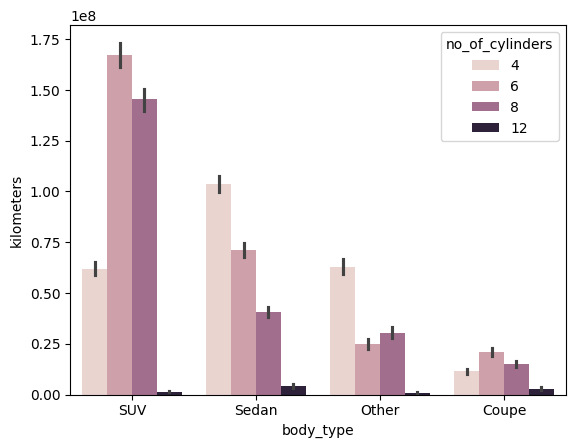

In [214]:
sns.barplot(data=df,x='body_type',y='kilometers',hue=df['no_of_cylinders'],estimator=sum)

In [215]:
df.pivot_table(columns='body_type',index='no_of_cylinders',values='kilometers',aggfunc=sum)

body_type,Coupe,Other,SUV,Sedan
no_of_cylinders,,,,
4,11393638.0,62896367.0,61819485.0,103546353.0
6,20850443.0,24820676.0,167385522.0,71362649.0
8,15083949.0,30550076.0,145424777.0,40639270.0
12,2959821.0,923606.0,1435891.0,4195882.0


## 30- For each body_type for each no_of_cylinders calculate the sum of kilometers driven in average


<Axes: xlabel='body_type', ylabel='kilometers'>

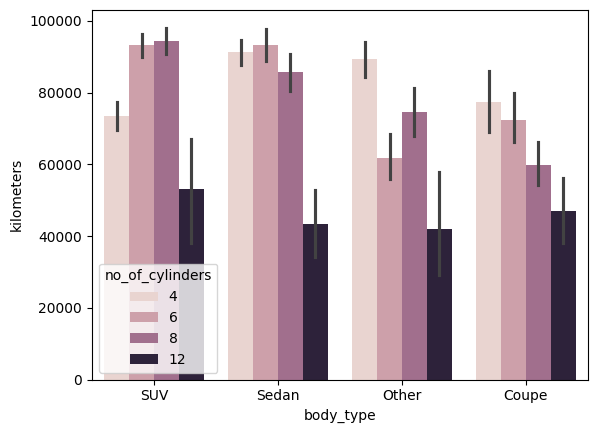

In [216]:
sns.barplot(data=df,x='body_type',y='kilometers',hue=df['no_of_cylinders'])

In [217]:
df.pivot_table(columns='body_type',index='no_of_cylinders',values='kilometers')

body_type,Coupe,Other,SUV,Sedan
no_of_cylinders,,,,
4,77507.741497,89341.430398,73507.116528,91230.266960
6,72397.371528,61896.947631,93147.202003,93406.608639
8,59856.940476,74694.562347,94370.393900,85736.856540
12,46981.285714,41982.090909,53181.148148,43256.515464
